# Pandas

In [42]:
import pandas as pd

In [43]:
cities = {'name': ["Copenhagen", "London"],
          'population': [1.5, 11.2],
          'dist_to_coast': [0.0, 2.3]}

In [44]:
df = pd.DataFrame(cities)
df

,name,population,dist_to_coast
0,Copenhagen,1.5,0.0
1,London,11.2,2.3


In [45]:
df[df.name=='London']

,name,population,dist_to_coast
1,London,11.2,2.3


In [46]:
df.population.mean()

6.35

## Get row by number

In [47]:
df.iloc[0]

name             Copenhagen
population              1.5
dist_to_coast           0.0
Name: 0, dtype: object

In [48]:
df.iloc[1]

name             London
population         11.2
dist_to_coast       2.3
Name: 1, dtype: object

## Get row by name (named index)

In [49]:
df = df.set_index('name')
df

,population,dist_to_coast
name,,
Copenhagen,1.5,0.0
London,11.2,2.3


In [50]:
df.loc["London"]

population       11.2
dist_to_coast     2.3
Name: London, dtype: float64

In [51]:
df.index

Index(['Copenhagen', 'London'], dtype='object', name='name')

In [52]:
df.columns

Index(['population', 'dist_to_coast'], dtype='object')

We can transpose the dataframe, (rows -> columns)

In [53]:
df.T

name,Copenhagen,London
population,1.5,11.2
dist_to_coast,0.0,2.3


In [54]:
df.loc["London"].population

11.2

## Delimited files

Delimited files, separated by comma, semi-colon, tabs, spaces or any other special character, is a very common data format for tabular data. Comma separated value (csv) files can be read by the [pandas `read_csv` function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). It is a very powerful function, with a lot of options. It is very rare, that you have to write your own python function to parse csv files.

Below is an example of csv file:

![](images/csv_example.png)


* Header with comments
* Columns are separated with semi-colon (;)
* Decimal separator is (,)
* Date and time are in separate columns
* There is a redundant station column
* The column names are not in english 

In [55]:
df = pd.read_csv("data/boogus.csv", 
                 comment="%",
                 sep=";",
                 decimal=",",
                 parse_dates=[["dato","tid"]],
                 usecols=[1,2,3])
df

,dato_tid,temperatur
0,2000-03-01 10:00:00,3.50
1,2000-03-02 12:00:00,3.80
2,2000-03-03 10:00:00,4.23
3,2000-03-04 13:00:00,10.50


Most functions in Pandas returns a copy, so even though the below line, looks like it changes the name, since it is printed to the screen, the `df` variable is not changed.

In [56]:
df.rename(columns={"temperatur": "air_temperature"})

,dato_tid,air_temperature
0,2000-03-01 10:00:00,3.50
1,2000-03-02 12:00:00,3.80
2,2000-03-03 10:00:00,4.23
3,2000-03-04 13:00:00,10.50


In [57]:
df # not modfied

,dato_tid,temperatur
0,2000-03-01 10:00:00,3.50
1,2000-03-02 12:00:00,3.80
2,2000-03-03 10:00:00,4.23
3,2000-03-04 13:00:00,10.50


In [17]:
df_new_name = df.rename(columns={"temperatur": "air_temperature"})
df_new_name

,dato_tid,air_temperature
0,2000-03-01 10:00:00,3.50
1,2000-03-02 12:00:00,3.80
2,2000-03-03 10:00:00,4.23
3,2000-03-04 13:00:00,10.50


**Inline exercise**

1. Calculate the min and max tempterature by selecting the `air_temperature` column from the `df_new_name` dataframe like this: `df_new_name.air_temperature` and call the .`min()` and `max()` methods.
2. Read the csv file again, but this time include all columns.
3. Read the csv file once more, but don't use the comment argument, use another argument to skip the first four rows. Help: `pd.read_csv?`

## Timeseries

In [18]:
df = pd.read_csv("data/oceandata.csv", parse_dates=True, index_col='datetime')

In [19]:
df.head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:30:00,-0.23,0.852451,10.852451
2015-02-18 12:40:00,-0.25,0.902668,10.902668
2015-02-18 12:50:00,-0.26,0.163363,10.163363
2015-02-18 13:00:00,-0.27,0.668361,10.668361
2015-02-18 13:10:00,-0.28,0.069319,10.069319


In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
type(df.waterlevel)

pandas.core.series.Series

<AxesSubplot: xlabel='datetime'>

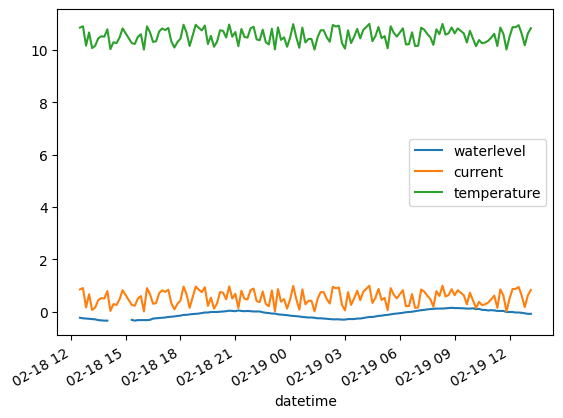

In [22]:
df.plot()

<AxesSubplot: xlabel='datetime'>

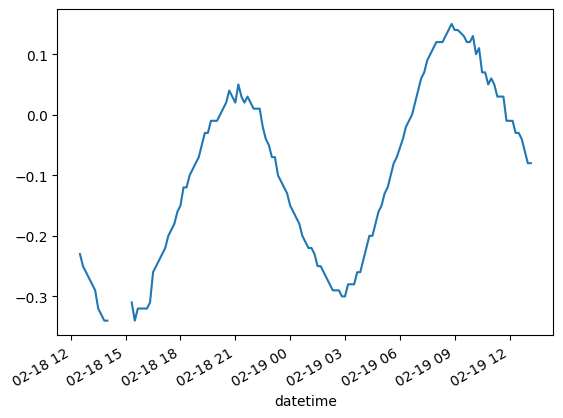

In [23]:
df.waterlevel.plot()

In [24]:
df.index

DatetimeIndex(['2015-02-18 12:30:00', '2015-02-18 12:40:00',
               '2015-02-18 12:50:00', '2015-02-18 13:00:00',
               '2015-02-18 13:10:00', '2015-02-18 13:20:00',
               '2015-02-18 13:30:00', '2015-02-18 13:40:00',
               '2015-02-18 13:50:00', '2015-02-18 14:00:00',
               ...
               '2015-02-19 11:40:00', '2015-02-19 11:50:00',
               '2015-02-19 12:00:00', '2015-02-19 12:10:00',
               '2015-02-19 12:20:00', '2015-02-19 12:30:00',
               '2015-02-19 12:40:00', '2015-02-19 12:50:00',
               '2015-02-19 13:00:00', '2015-02-19 13:10:00'],
              dtype='datetime64[ns]', name='datetime', length=144, freq=None)

In [25]:
df.describe()

,waterlevel,current,temperature
count,139.000000,144.000000,144.000000
mean,-0.098129,0.530844,10.530844
std,0.144847,0.278987,0.278987
min,-0.340000,0.012785,10.012785
25%,-0.235000,0.295251,10.295251
50%,-0.080000,0.507880,10.507880
75%,0.020000,0.786672,10.786672
max,0.150000,0.993855,10.993855


<AxesSubplot: xlabel='datetime'>

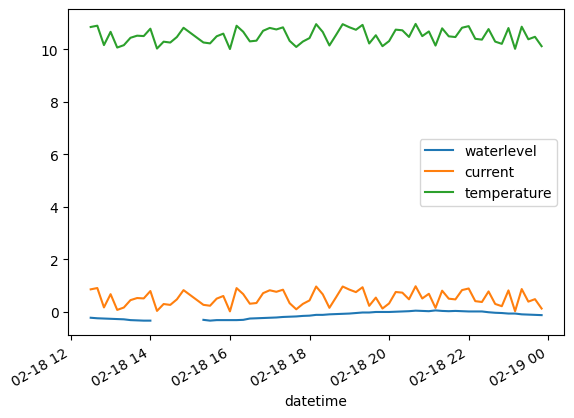

In [26]:
df.loc['2015-02-18'].plot()

<AxesSubplot: xlabel='datetime'>

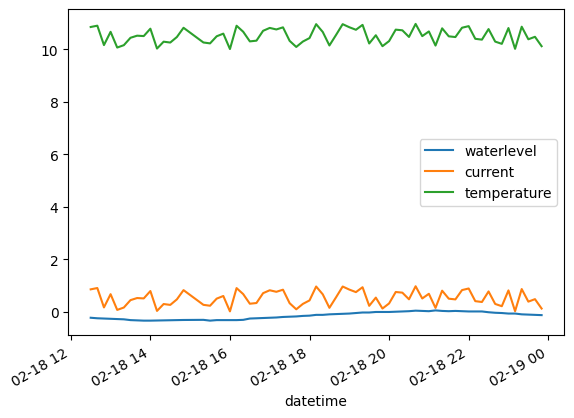

In [27]:
df.loc['2015-02-18'].interpolate().plot()

In [28]:
df.loc['2015-02-18 14:00':'2015-02-18 15:20']

,waterlevel,current,temperature
datetime,,,
2015-02-18 14:00:00,-0.34,0.788007,10.788007
2015-02-18 14:10:00,NaN,0.030756,10.030756
2015-02-18 14:20:00,NaN,0.293056,10.293056
2015-02-18 14:30:00,NaN,0.259692,10.259692
2015-02-18 14:40:00,NaN,0.471166,10.471166
2015-02-18 14:50:00,NaN,0.822787,10.822787
2015-02-18 15:20:00,-0.31,0.262204,10.262204


In [29]:
df_interp = df.interpolate()

In [30]:
df_interp.loc['2015-02-18 14:00':'2015-02-18 15:20']

,waterlevel,current,temperature
datetime,,,
2015-02-18 14:00:00,-0.340,0.788007,10.788007
2015-02-18 14:10:00,-0.335,0.030756,10.030756
2015-02-18 14:20:00,-0.330,0.293056,10.293056
2015-02-18 14:30:00,-0.325,0.259692,10.259692
2015-02-18 14:40:00,-0.320,0.471166,10.471166
2015-02-18 14:50:00,-0.315,0.822787,10.822787
2015-02-18 15:20:00,-0.310,0.262204,10.262204


## Resampling

Aggregate temporal data 

In [31]:
df.resample('H')

Resampling requires an aggregation function, e.g., sum, mean, median,...

In [32]:
df.resample('D').sum().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18,-8.36,34.500139,704.500139
2015-02-19,-5.28,41.941404,811.941404


The `sum` function doesn't make sense in this example. Better to use `mean`.

In [33]:
df.resample('H').mean().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:00:00,-0.246667,0.639494,10.639494
2015-02-18 13:00:00,-0.305000,0.394493,10.394493
2015-02-18 14:00:00,-0.340000,0.444244,10.444244
2015-02-18 15:00:00,-0.322500,0.397150,10.397150
2015-02-18 16:00:00,-0.283333,0.488036,10.488036


In [34]:
df.resample('H').first().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:00:00,-0.23,0.852451,10.852451
2015-02-18 13:00:00,-0.27,0.668361,10.668361
2015-02-18 14:00:00,-0.34,0.788007,10.788007
2015-02-18 15:00:00,-0.31,0.262204,10.262204
2015-02-18 16:00:00,-0.32,0.012785,10.012785


In [35]:
df.resample('H').median().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:00:00,-0.250,0.852451,10.852451
2015-02-18 13:00:00,-0.305,0.473989,10.473989
2015-02-18 14:00:00,-0.340,0.382111,10.382111
2015-02-18 15:00:00,-0.320,0.380533,10.380533
2015-02-18 16:00:00,-0.285,0.501532,10.501532


In [36]:
df_h = df.resample('H').interpolate().dropna()
df_h.head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 13:00:00,-0.27,0.668361,10.668361
2015-02-18 14:00:00,-0.34,0.788007,10.788007
2015-02-18 15:00:00,-0.33,0.400396,10.400396
2015-02-18 16:00:00,-0.32,0.012785,10.012785
2015-02-18 17:00:00,-0.23,0.817479,10.817479


Note: resample will use either the left or the right end-point depending on the resampling frequency (e.g. for hours the beginning of the hour but for months the end of the month). If you want to make sure you are resampling right - specify the closed argument.

## Extrapolation

<AxesSubplot: >

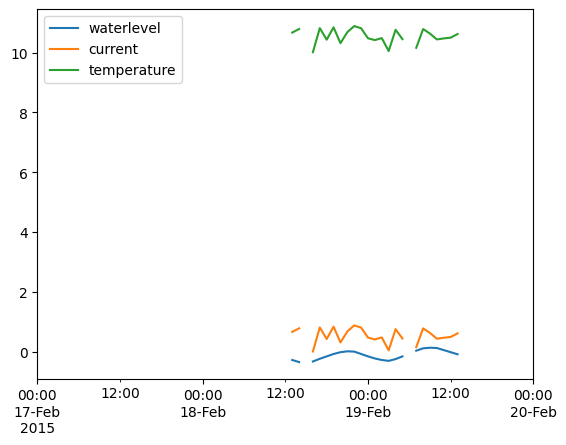

In [37]:
rng = pd.date_range("2015-02-17","2015-02-20",freq='H')
ix = pd.DatetimeIndex(rng)
dfr = df_interp.reindex(ix)
dfr.plot()

<AxesSubplot: >

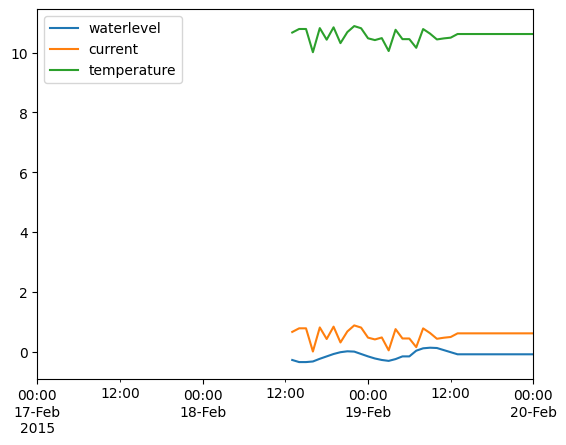

In [38]:
dfr.ffill().plot()

<AxesSubplot: >

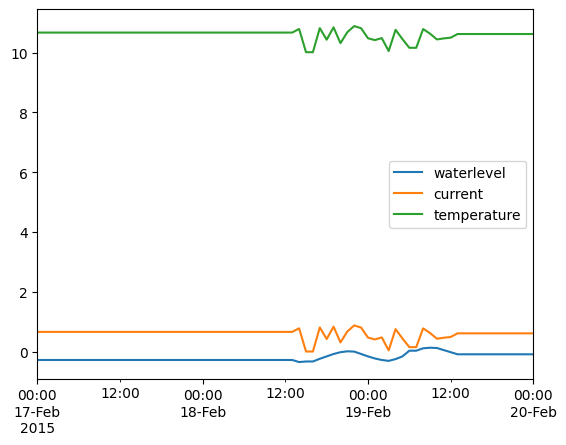

In [39]:
df_extra = dfr.bfill().ffill()
df_extra.plot()

In [40]:
df_extra

,waterlevel,current,temperature
2015-02-17 00:00:00,-0.27,0.668361,10.668361
2015-02-17 01:00:00,-0.27,0.668361,10.668361
2015-02-17 02:00:00,-0.27,0.668361,10.668361
2015-02-17 03:00:00,-0.27,0.668361,10.668361
2015-02-17 04:00:00,-0.27,0.668361,10.668361
...,...,...,...
2015-02-19 20:00:00,-0.08,0.619919,10.619919
2015-02-19 21:00:00,-0.08,0.619919,10.619919
2015-02-19 22:00:00,-0.08,0.619919,10.619919
2015-02-19 23:00:00,-0.08,0.619919,10.619919


In [41]:
from IPython.display import YouTubeVideo

YouTubeVideo("8upGdZMlkYM")

KeyboardInterrupt: 

For more tips and tricks on how to use Pandas for timeseries data see this talk:
[Ian Ozsvald: A gentle introduction to Pandas timeseries and Seaborn | PyData London 2019](https://www.youtube.com/watch?v=8upGdZMlkYM)

: 